# MOVIE RATING PREDICTION WITH PYTHON

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# importing the dataset

data = pd.read_csv(r"D:\CODSOFT\Task_2\IMDb_Movies_India.csv",encoding='ISO-8859-1')

In [3]:
#Showing the first five rows of the dataset
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.shape

(15509, 10)

In [5]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data.duplicated().sum()

6

In [8]:
#Dropped the duplicate columns
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
#count the numbers of null values in each columns
data.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [11]:
# Data cleaning process
data['Duration'] = data['Duration'].str.replace('min', '').apply(pd.to_numeric)
data["Votes"] = data["Votes"].replace("$5.16M", 516)
data["Votes"] = pd.to_numeric(data['Votes'].str.replace(',', ''))

In [12]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [13]:
# Dropping null values
data.dropna(subset=['Year'], inplace=True)
data.dropna(subset=['Genre'], inplace=True)

In [14]:
# Replacing Null Values ....

# filling the rating null values with the maximum number of occurance of rating
data['Rating'].fillna(data['Rating'].mode().max(), inplace=True)

# filling the duration null values with the mean of the duration
data['Duration'].fillna(data['Duration'].mean(), inplace=True)

# filling the votes null values with the mean of the votes values
data['Votes'].fillna(data['Votes'].mean(), inplace=True)

# Dropping the rows with any null values left
data.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [15]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
data.shape

(11085, 10)

In [17]:
# Data Visualisation process
genres = data['Genre'].str.split(', ', expand=True)

genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")


Action: 3170
Adventure: 485
Animation: 54
Biography: 158
Comedy: 1872
Crime: 1262
Documentary: 83
Drama: 6394
Family: 871
Fantasy: 402
History: 171
Horror: 416
Music: 65
Musical: 552
Mystery: 466
News: 1
Reality-TV: 2
Romance: 2189
Sci-Fi: 48
Sport: 58
Thriller: 1266
War: 38
Western: 3


In [18]:
# Defined function to take column name and visualise the top 10 values 
def Talents(column):
    global data
    data[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [19]:
# Defined function to take column and visualise the histogram plot
def Histo(column):
    global data
    plt.figure(figsize=(20,6))
    plt.hist(data[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [20]:
# Defined a function to take two column and visualise the scatter plot between them 
def Scatter(x, y, c=None):
    global data
    plt.figure(figsize=(20,6))
    plt.scatter(data[x], data[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

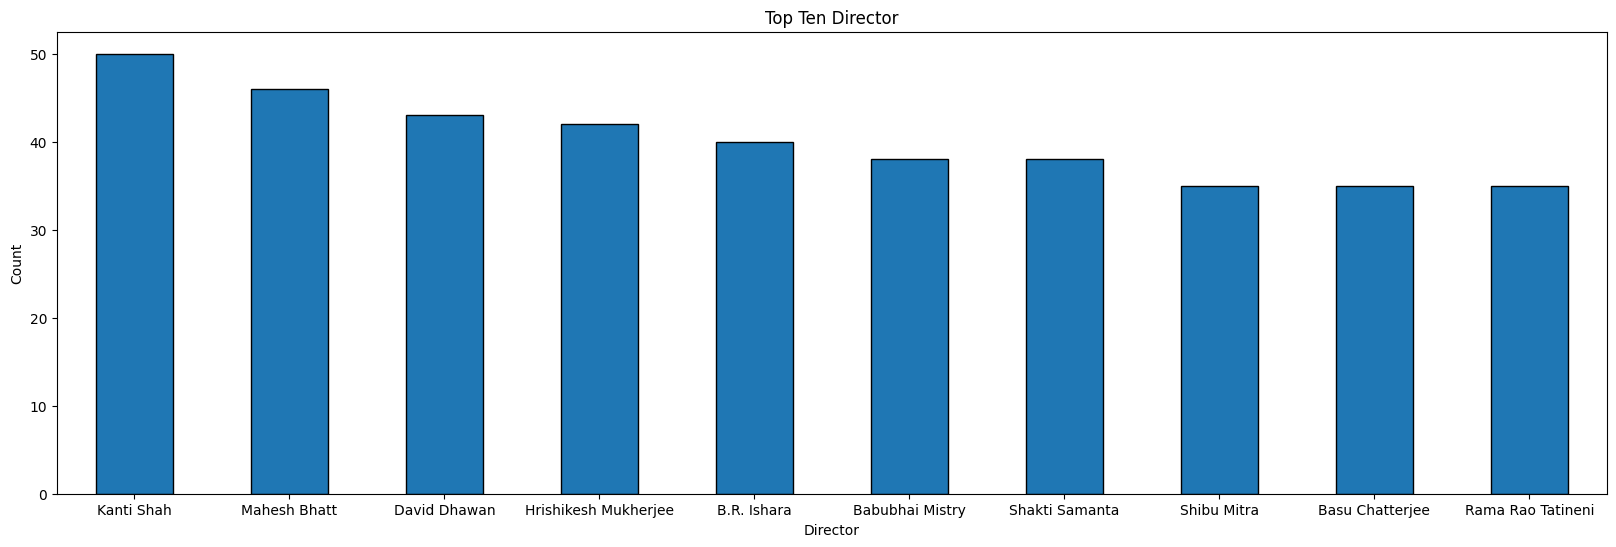

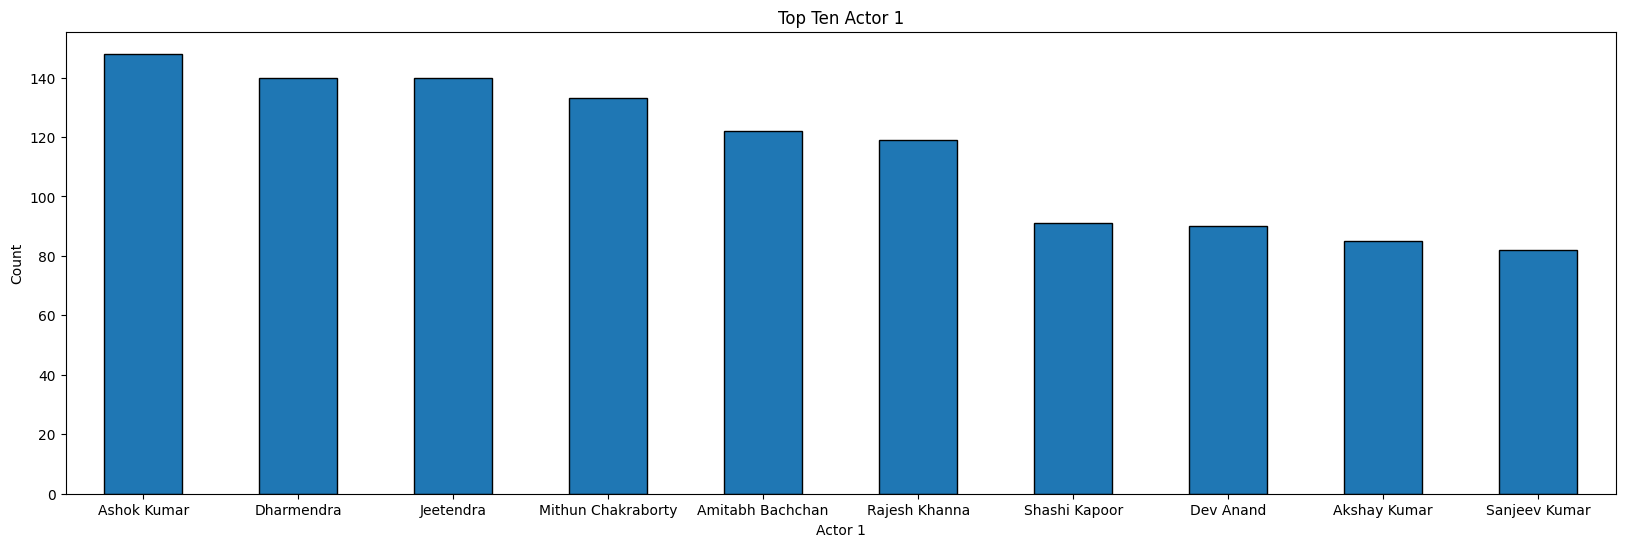

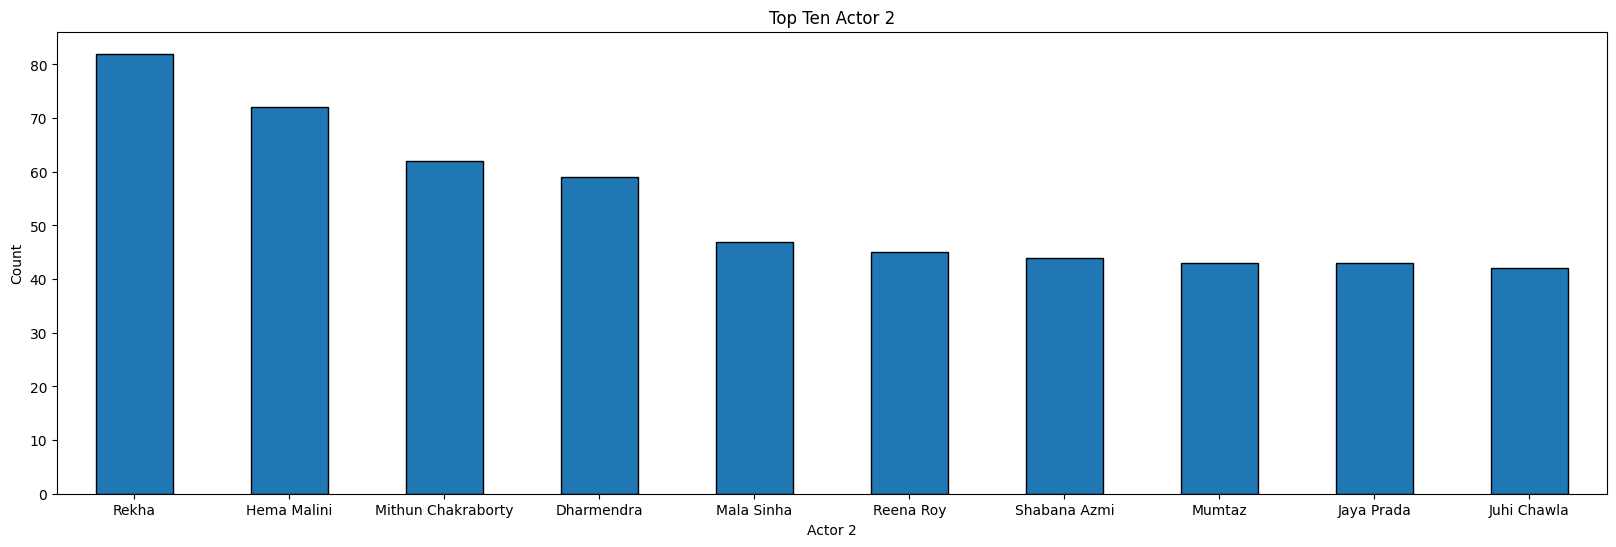

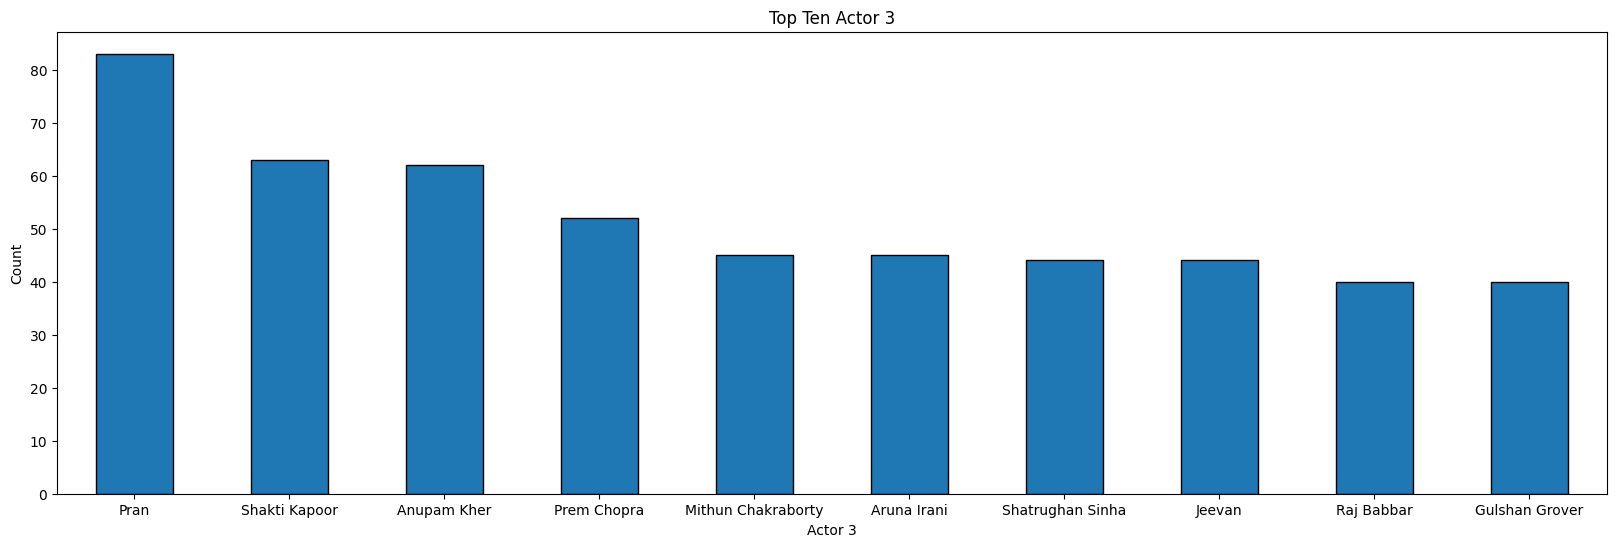

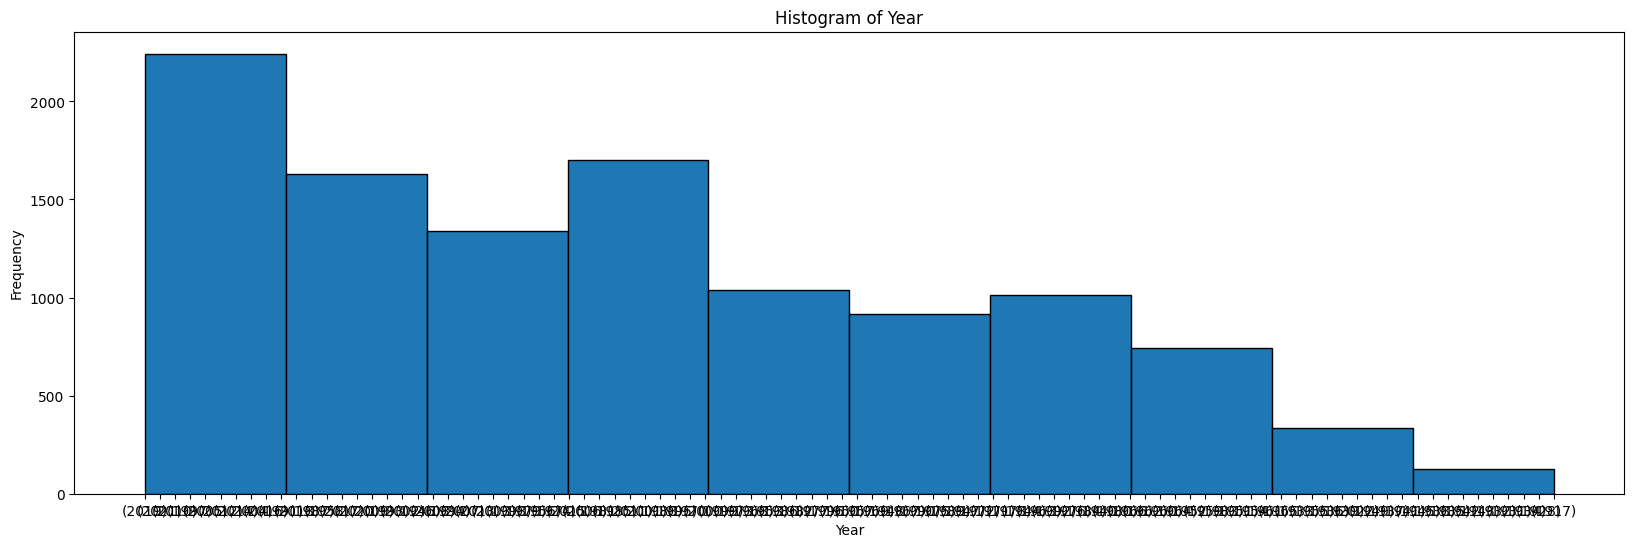

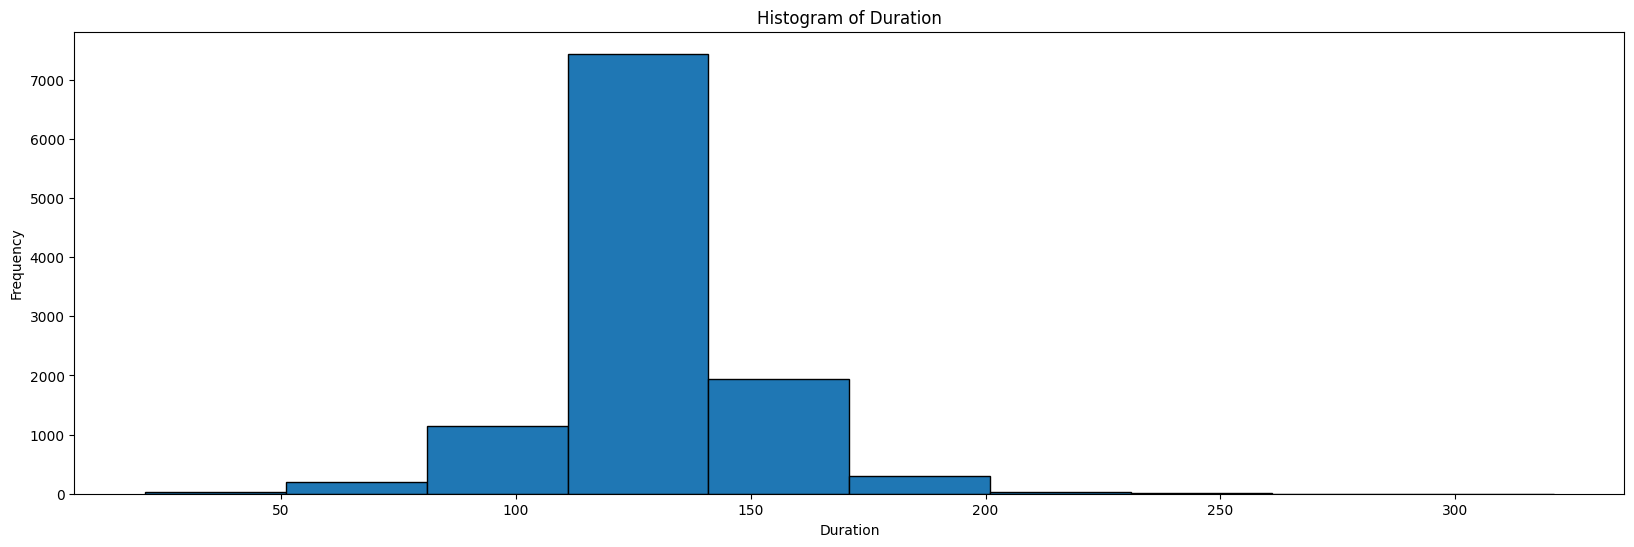

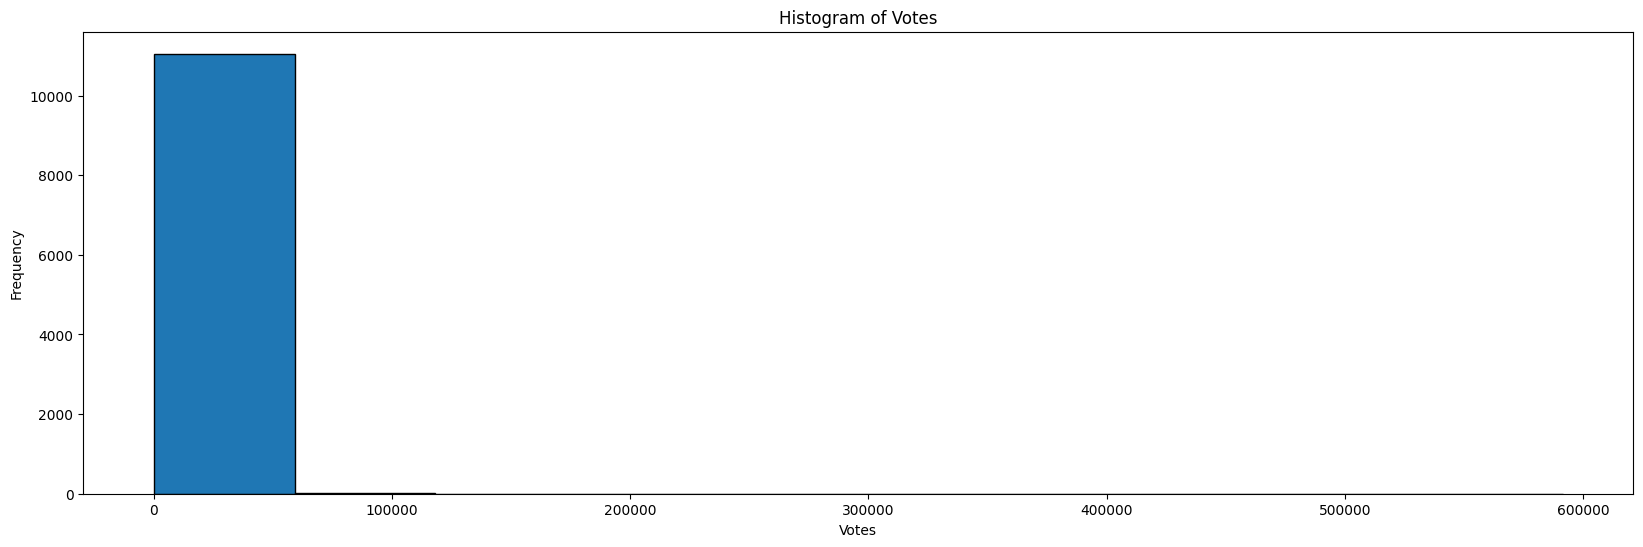

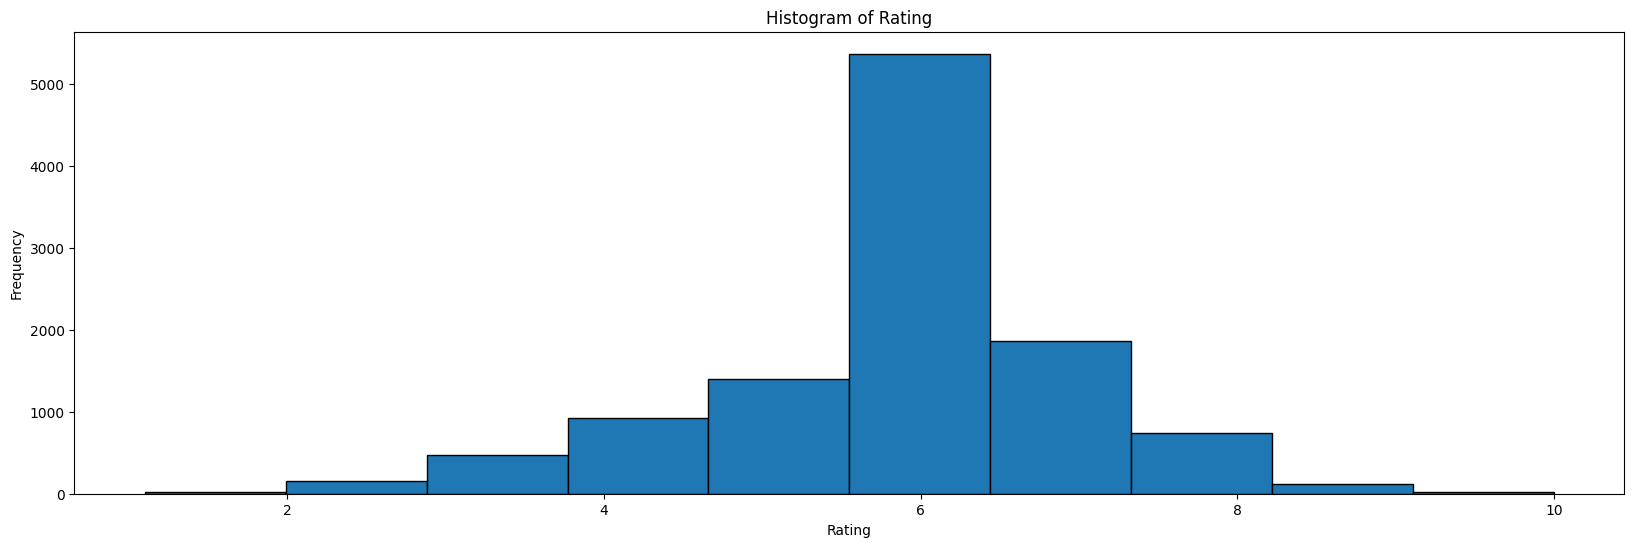

In [21]:
Talents("Director")
Talents("Actor 1")
Talents("Actor 2")
Talents("Actor 3")
Histo("Year")
Histo("Duration")
Histo("Votes")
Histo("Rating")

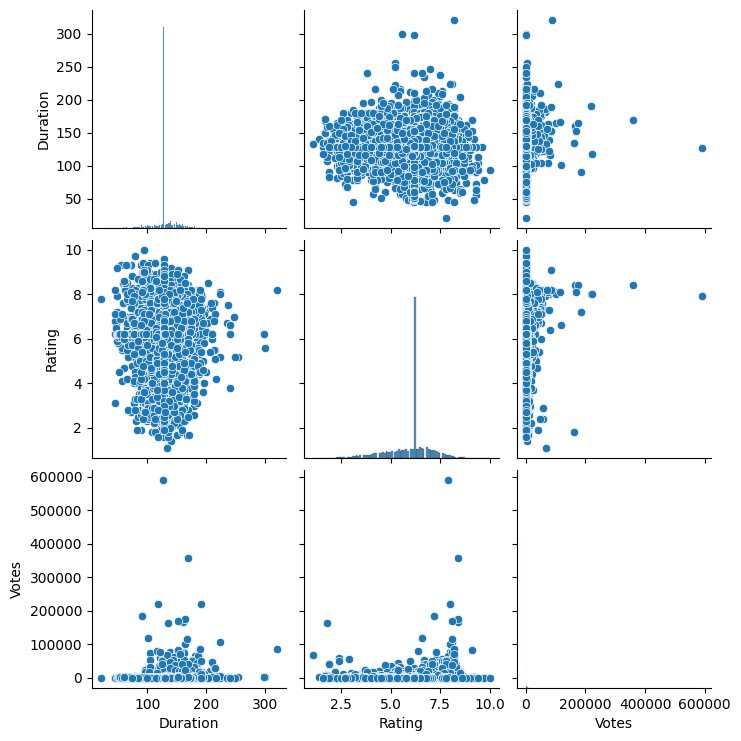

In [22]:
sns.pairplot(data)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr(method='spearman')

In [23]:
# Model Development

non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [24]:
data.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
(round(data.isnull().sum()/data.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [25]:
# Extracting the numeric part from the 'Year' column
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)

In [26]:
# Encoding categorical variables based on mean ratings
actor1_encoding_map = data.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = data.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = data.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = data.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = data.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

data['actor1_encoded'] = round(data['Actor 1'].map(actor1_encoding_map), 1)
data['actor2_encoded'] = round(data['Actor 2'].map(actor2_encoding_map), 1)
data['actor3_encoded'] = round(data['Actor 3'].map(actor3_encoding_map), 1)
data['director_encoded'] = round(data['Director'].map(director_encoding_map), 1)
data['genre_encoded'] = round(data['Genre'].map(genre_encoding_map), 1)

In [27]:

# Drop original categorical columns
data.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

In [28]:
# Define features and target variable
X = data[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = data['Rating']

In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model Building - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model Building - Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [31]:
# Evaluate Linear Regression
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

# Evaluate Random Forest Regressor
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

Linear Regression Metrics:
Mean Squared Error: 0.36795260189274104
Mean Absolute Error: 0.4309751133405124
R2 Score: 0.7107883653899203

Random Forest Regressor Metrics:
Mean Squared Error: 0.2671512151556157
Mean Absolute Error: 0.3041217861975693
R2 Score: 0.7900184990518232


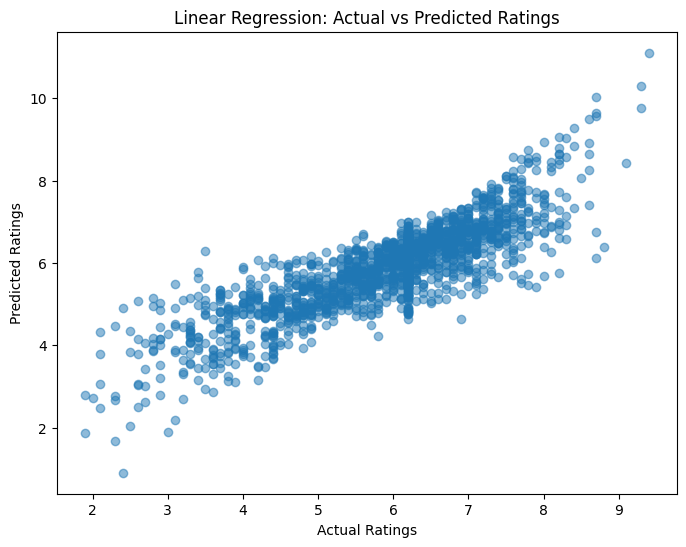

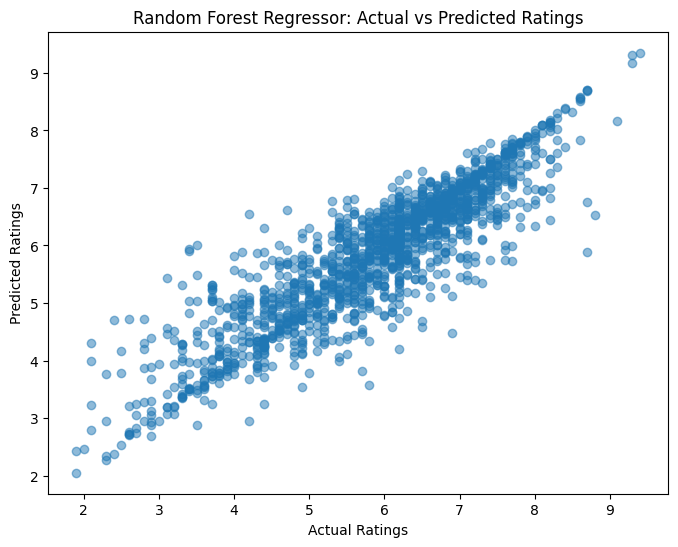

In [32]:
# Scatter plot for Linear Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Random Forest Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()